In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

0.1  Data Set Information:
The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

In [3]:
# Creating Algerian_forest_fires_dataset_UPDATE datasets dataframe as df 

df = pd.read_csv('https://raw.githubusercontent.com/Sunita778/Exploratory-Data-Analysis/main/Algerian_forest_fires_dataset/Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
#### Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
#### FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

Abstract: The dataset includes 244 instances that regroup a data of two regions of Algeria.

Data Set Characteristics: Multivariate

Number of Instances: 244

Number of Attributes: 12

Associated Tasks: Classification, Regression

Missing Values? N/A

Attribute Characteristics: Real

Area: Life

Number of Web Hits: 56212

Date Donated: 2019-10-22

In [4]:
# Shape of the dataframe

df.shape

(246, 14)

In [5]:
# All columns of the dataframe

df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [6]:
# Information about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [7]:
# Creating a Copy of the dataframe

df1 =df.copy()

In [8]:
# There is two empty rows in this dataframe at index no. 122 and 123. 
# For removing 122 and 123 index from dataframe

df1 = df1.drop(index=[122,123], axis=0)

In [9]:
# Creating a new region column Bejaia Region and Sidi-Bel Abbes Region 

region = []
for i in range(244):
    if i < 122:
        region.append('Bejaia')
    else:
        region.append('Sidi-Bel Abbes Region')

df1['Region'] = region

In [10]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Observation from columns : There is space in some columns. So it requires cleaning.

In [11]:
# Removing left and right space from columns

df1.columns = [i.strip() for i in df1.columns]
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [12]:
df1.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [13]:
# Removing left and right space from Classes column

df1.Classes = df1.Classes.str.strip()
df1.Classes.unique()

array(['not fire', 'fire', nan], dtype=object)

In [14]:
# Replacing nan with mode value

df1['Classes'] = df1['Classes'].apply(lambda x: 'fire' if x=='fire' else 'not fire')

In [15]:
df1.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [16]:
# For changing the datatype of columns

#df1.apply(pd.to_numeric)
#Getting ValueError: Unable to parse string "14.6 9" at position 165

df1.iloc[165]

day                               14
month                             07
year                            2012
Temperature                       37
RH                                37
Ws                                18
Rain                             0.2
FFMC                            88.9
DMC                             12.9
DC                            14.6 9
ISI                             12.5
BUI                             10.4
FWI                          fire   
Classes                     not fire
Region         Sidi-Bel Abbes Region
Name: 167, dtype: object

In DC column '14.6 9' has a space between 6 and 9. And because of this it's giving Error.

In [17]:
#For fixing this error we can replce ' '(space) by ''

df1['DC'] = df1['DC'].str.replace(' ', '')

In [18]:
df1.iloc[165]

day                               14
month                             07
year                            2012
Temperature                       37
RH                                37
Ws                                18
Rain                             0.2
FFMC                            88.9
DMC                             12.9
DC                             14.69
ISI                             12.5
BUI                             10.4
FWI                          fire   
Classes                     not fire
Region         Sidi-Bel Abbes Region
Name: 167, dtype: object

In [19]:
# df1 = df1.apply(pd.to_numeric)
# ValueError: Unable to parse string "fire   " at position 165

df1['FWI'].iloc[165]

'fire   '

In [20]:
# Checking the unique value of  FWI column

df1['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

In FWI column all values are numeric but there is a categorical value (i.e - fire). Because of this categorical value it is not able to change the datatype.

In [21]:
# Replacing the fire value of FWI column

df1['FWI'].replace(to_replace= 'fire   ', value=None, inplace=True)

In [22]:
df1['FWI'].iloc[165]

'4.7'

In [23]:
# Changing datatype of columns

df1 = df1.apply(pd.to_numeric, errors='ignore')

In [24]:
# df1['day'] = pd.to_datetime(df1['day'])
# df1['month'] = pd.to_datetime(df1['month'])
# df1['year'] = pd.to_datetime(df1['year'])

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 30.5+ KB


In [26]:
# Saving the cleaned dataset

df1.to_csv('Algerian_forest_fires_cleaned_dataset.csv', index= False, header=True)

In [27]:
# checking shape of the cleaned data

df1.shape

(244, 15)

In [28]:
# checking column of the cleaned data

df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [29]:
# For checking missing values

df1.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [30]:
# Statistical summury of the dataframe

df1.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.025820
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.426747
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [31]:
# defining categorical columns

categorical_col = [fea for fea in df1.columns if df1[fea].dtype == 'O']
categorical_col

['Classes', 'Region']

In [32]:
# defining numerical columns

numerical_col = [fea for fea in df1.columns if df1[fea].dtype != 'O']
numerical_col

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

In [33]:
#removing 'day', 'month', 'year' and 'date' from numerical_col list as they are datetime data
numerical_col.remove('day')
numerical_col.remove('month')
numerical_col.remove('year')

In [34]:
numerical_col

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

#### Visualization of outliers using box plot

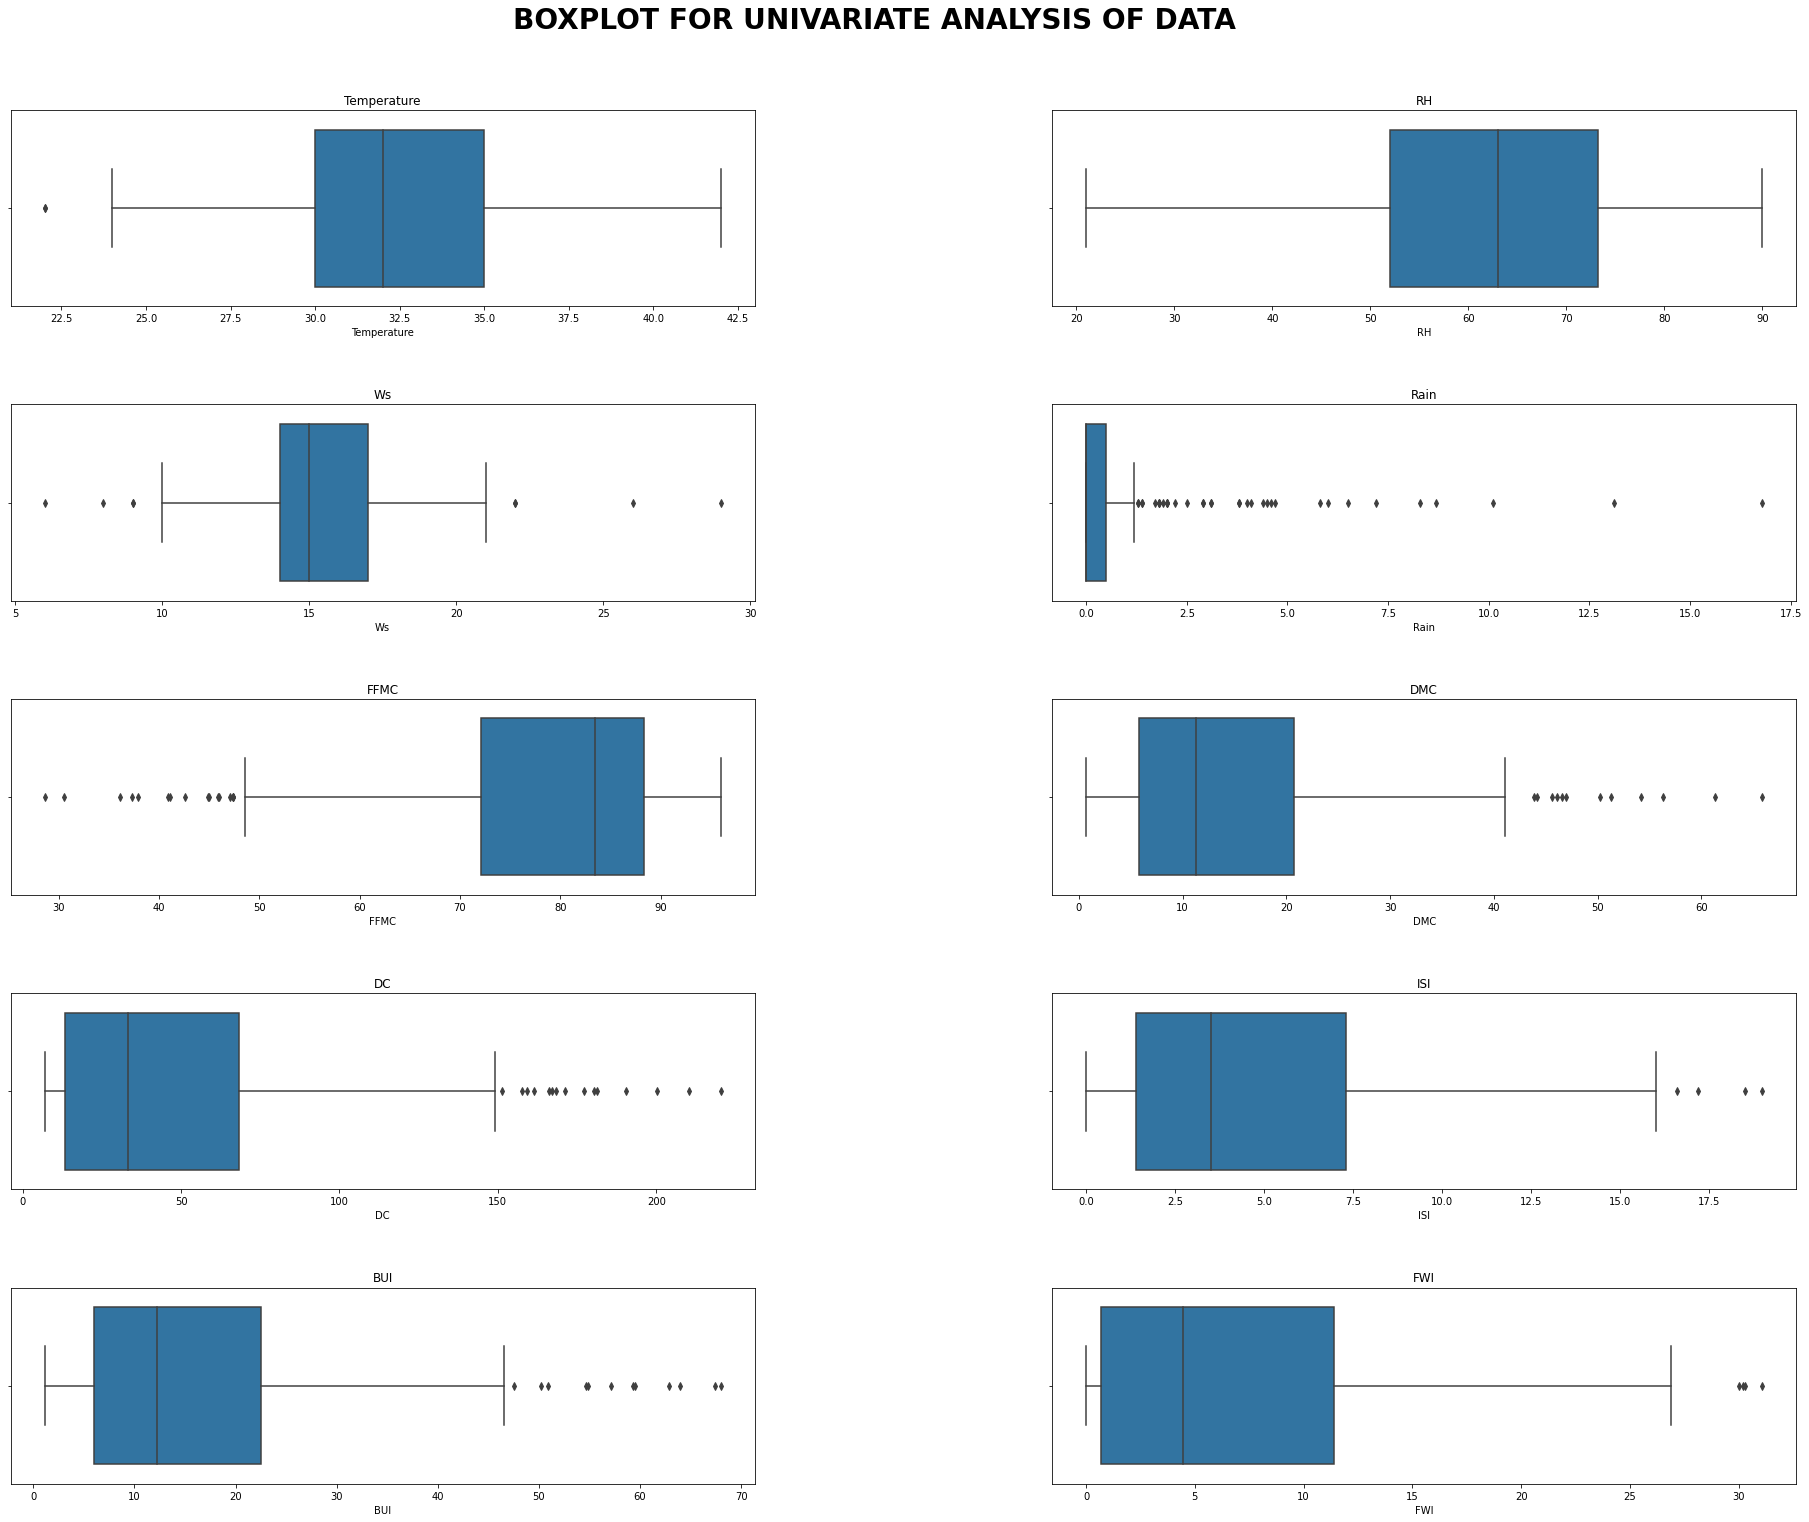

In [35]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT FOR UNIVARIATE ANALYSIS OF DATA', fontsize=28, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical_col):  
    ax1 = fig.add_subplot(5,2, i+1);
    ax1 = sns.boxplot(data = df1, x=col);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

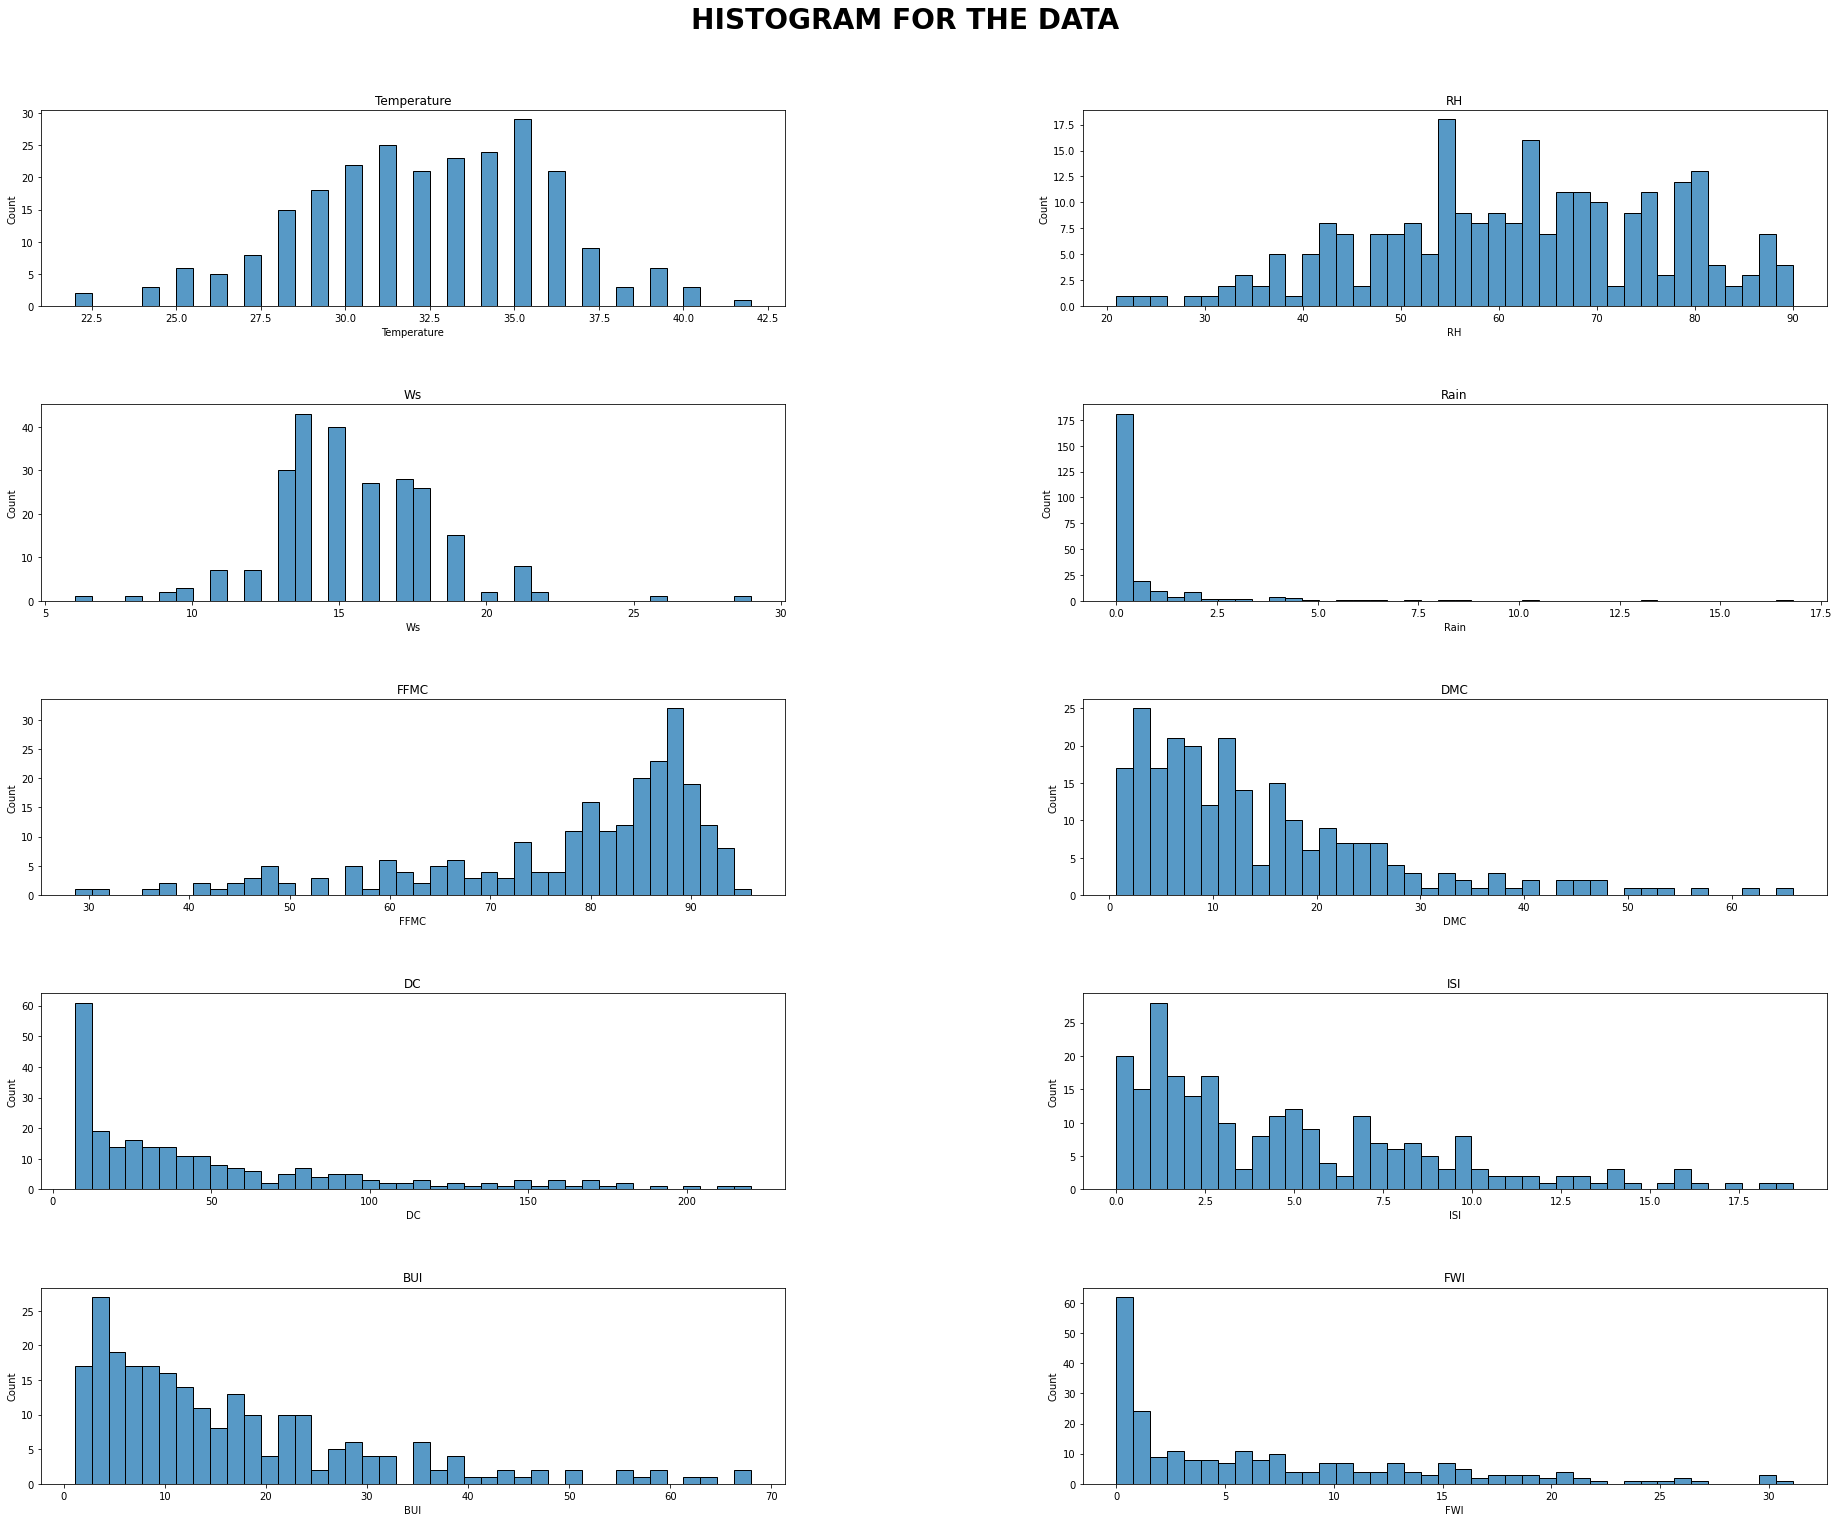

In [36]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('HISTOGRAM FOR THE DATA', fontsize=28, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical_col):  
    ax1 = fig.add_subplot(5,2, i+1);
    ax1 = sns.histplot(data = df1, x=col, bins=40);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

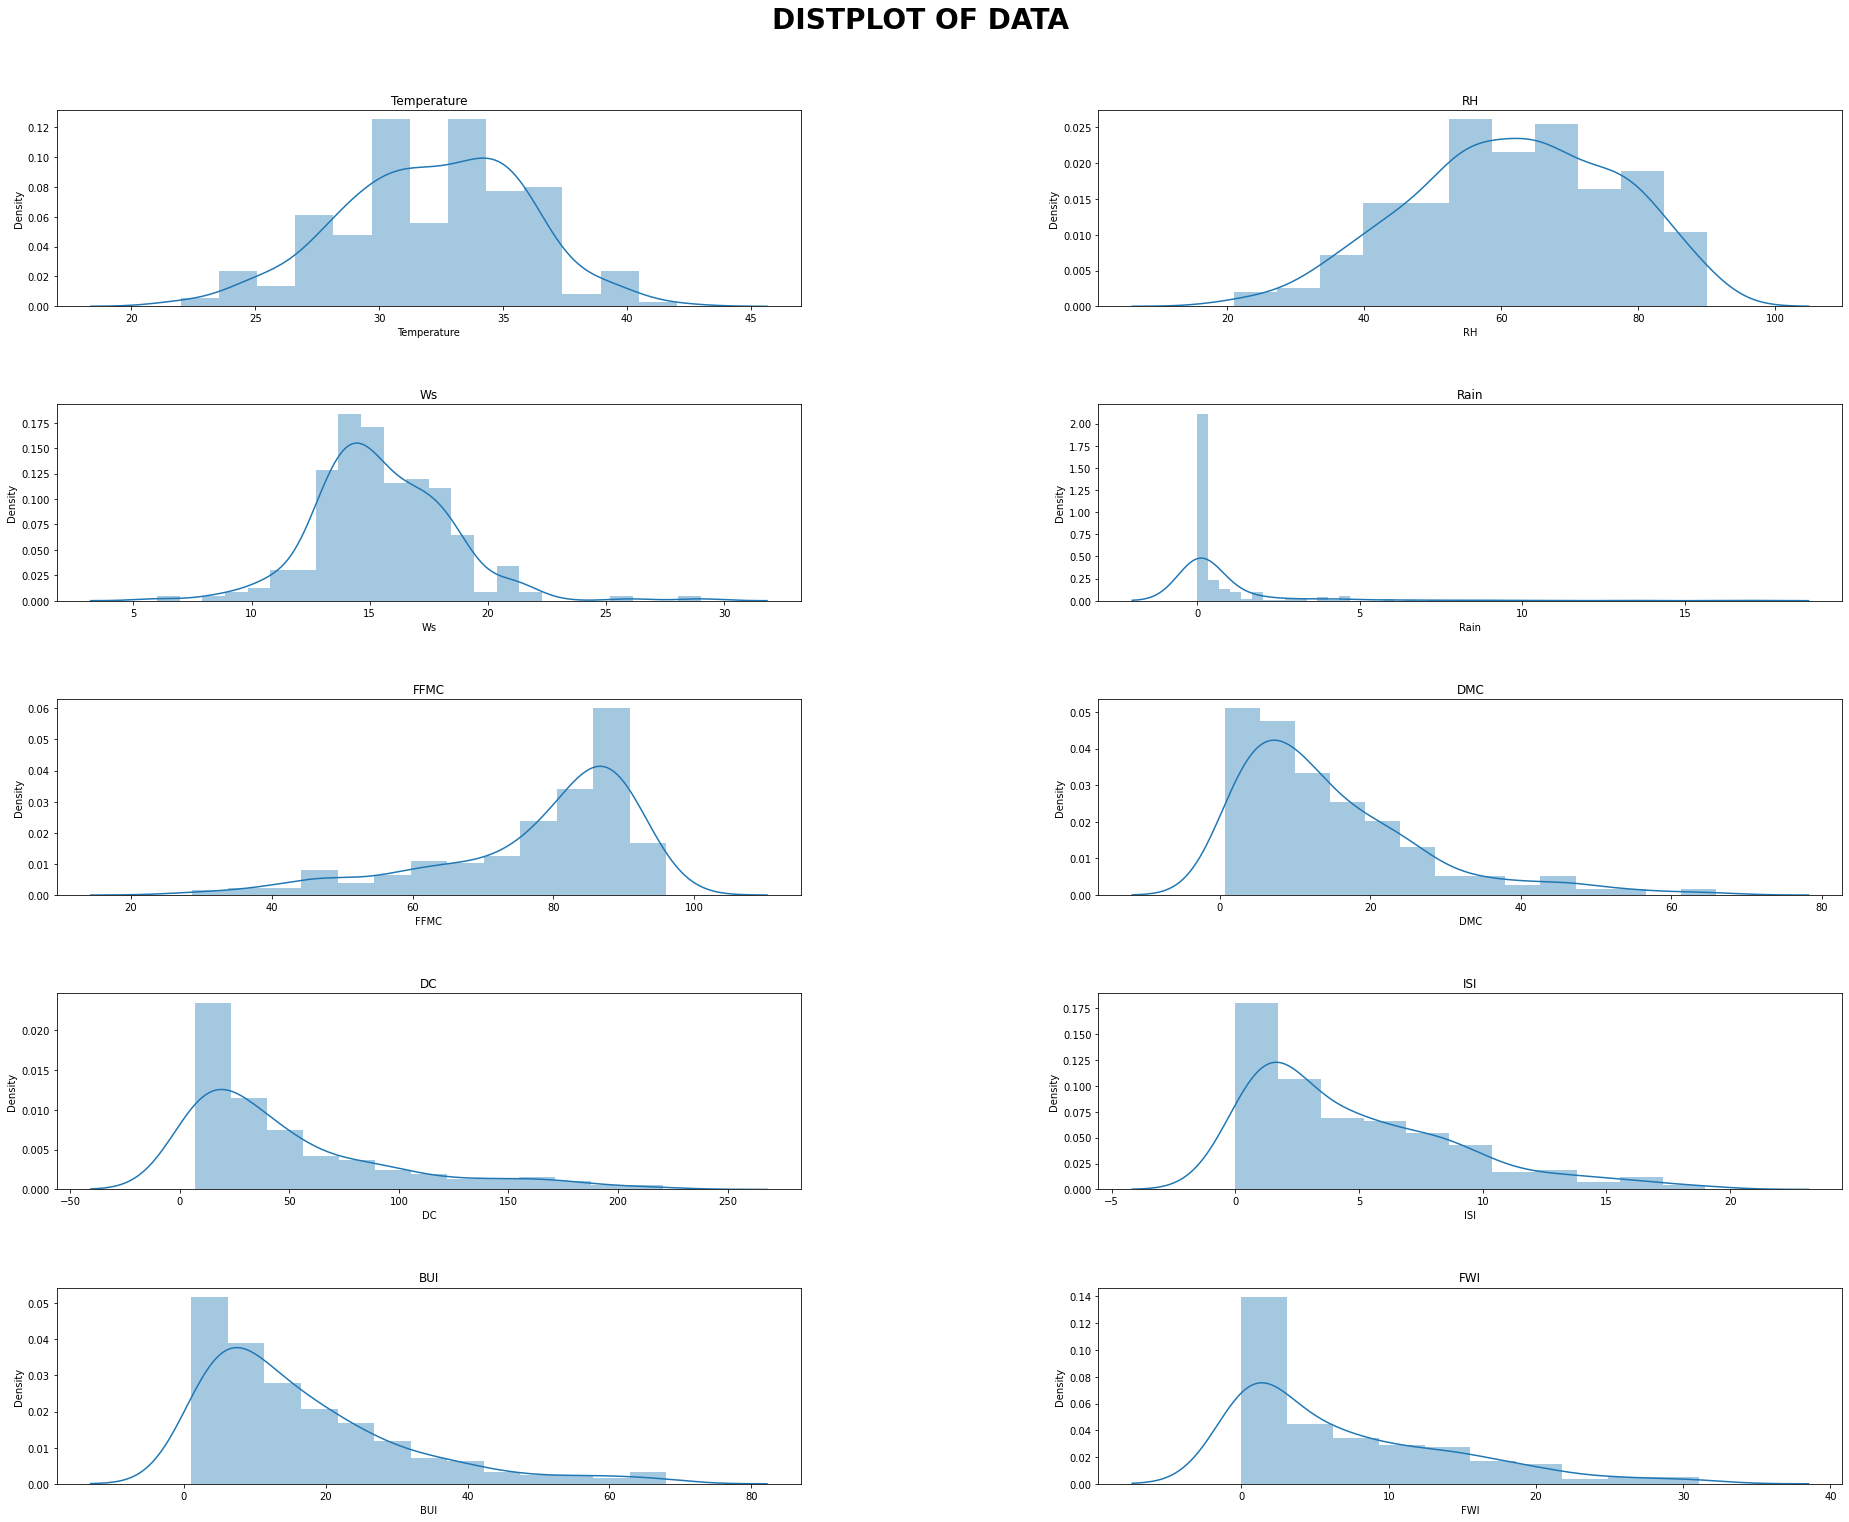

In [37]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF DATA', fontsize=28, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical_col):  
    ax1 = fig.add_subplot(5,2, i+1);
    ax1 = sns.distplot(df1[col]);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

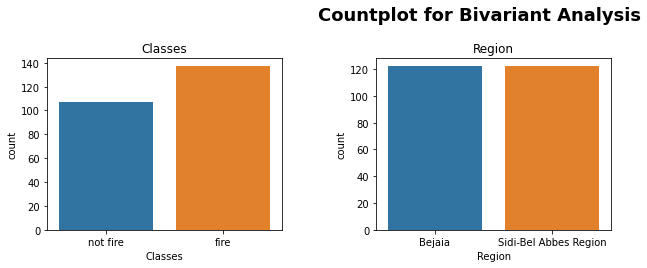

In [38]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Countplot for Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categorical_col,1):
    a = fig.add_subplot(3, 3, i)
    a=sns.countplot(x = df1[col] , ax=a)
    a.set_title(col)

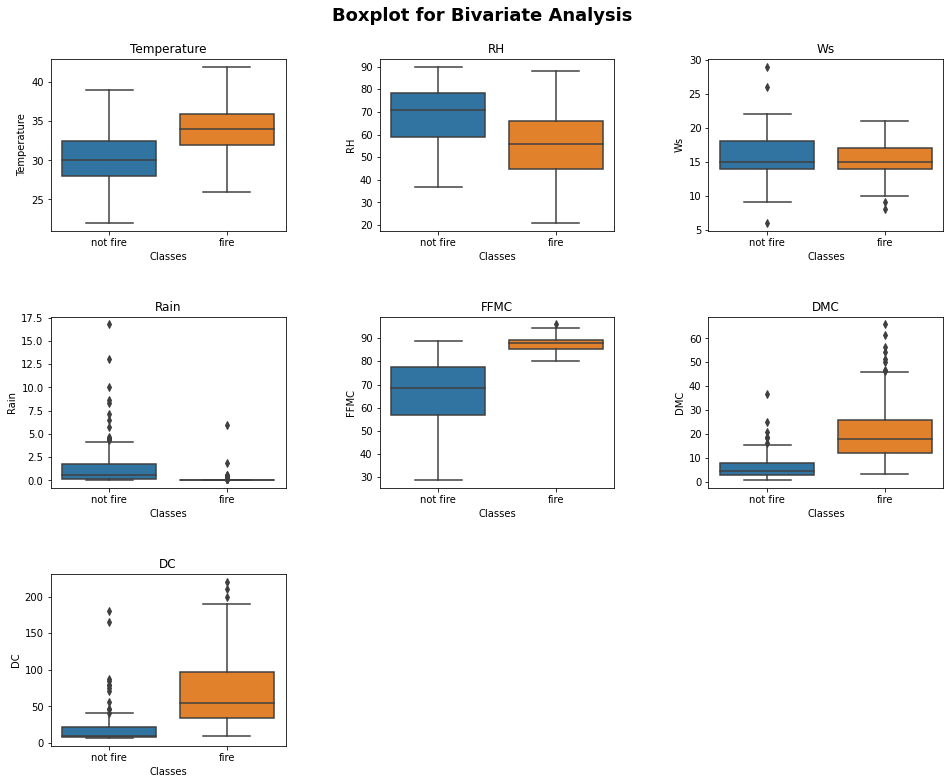

In [39]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Boxplot for Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical_col[0:7]):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.boxplot(x = 'Classes' , y =col , ax=a  , data = df1 )
    a.set_title(col)

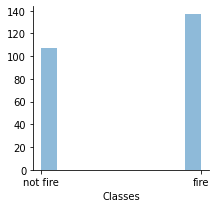

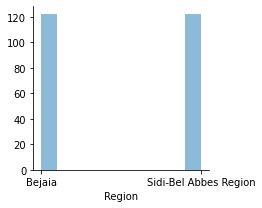

In [40]:
##FacetGrid for the categorical data

for i, col in enumerate(categorical_col, 1):
    ax = sns.FacetGrid(df1)
    ax.map(plt.hist, col, alpha = 0.5)
    ax.add_legend()

In [41]:
# Finding correlation

correlation = df1.corr()
correlation

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350938
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.083169
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.562766
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.575292
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.031159
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.323940
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.689155
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875835
DC,5.279300e-01,1.276691e-01,NaN,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739504


<AxesSubplot: >

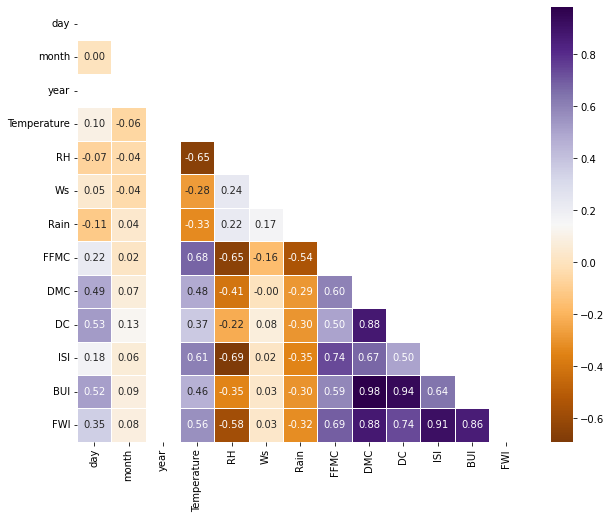

In [42]:
# Using Heatmap Correlation Analysis

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation))
sns.heatmap(correlation,mask= mask, annot=True, fmt='.2f', linewidths=0.5, cmap='PuOr')

#### For checking in which region and in which month how many days fire has occured

In [43]:
df1[df1['Classes'] == 'fire'].groupby(['Region', 'month'])[['day']].count()

day
Region                month     
Bejaia                6       13
                      7       15
                      8       24
                      9        7
Sidi-Bel Abbes Region 6       12
                      7       23
                      8       27
                      9       16

<AxesSubplot: xlabel='month', ylabel='count'>

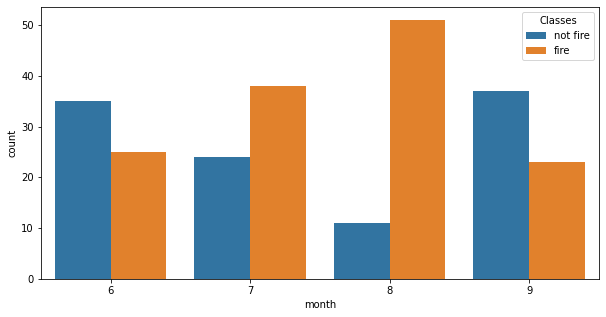

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1, x= 'month', hue='Classes')

### For checking in which region, there are how many fire days has not fire days


In [45]:
df1.groupby(['Region', 'Classes'])[['day']].count()

day
Region                Classes      
Bejaia                fire       59
                      not fire   63
Sidi-Bel Abbes Region fire       78
                      not fire   44

<AxesSubplot: xlabel='Region', ylabel='count'>

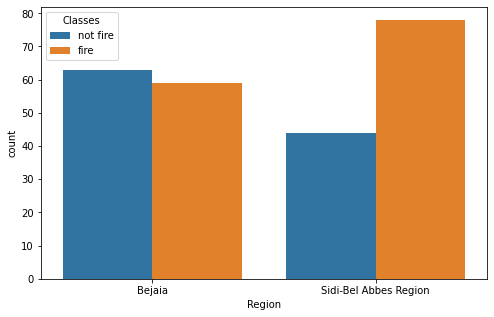

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(data=df1, x= 'Region', hue='Classes')

### For checking in which region temperature is high?

<AxesSubplot: xlabel='Region', ylabel='Temperature'>

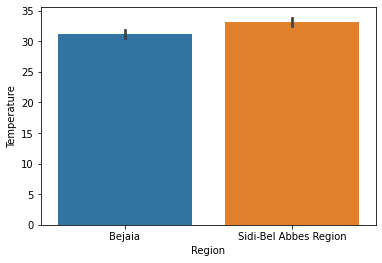

In [47]:
sns.barplot(x= 'Region', y= 'Temperature', data= df1)

### Visualizing graph of Rain with respect to Tempearture

<AxesSubplot: xlabel='Temperature', ylabel='Rain'>

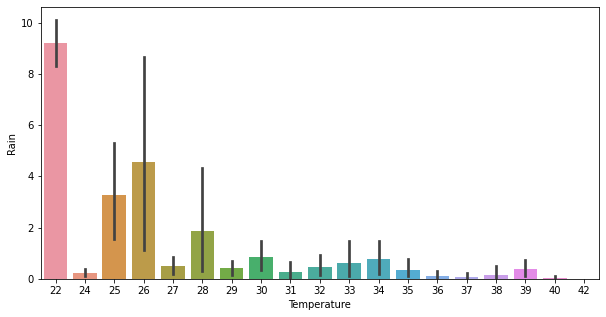

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(x='Temperature', y='Rain', data= df1)

## Training the model

In [49]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


In [50]:
#one hot encoded data

data = pd.get_dummies(df1, columns = ['Classes', 'Region'])
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_fire,Classes_not fire,Region_Bejaia,Region_Sidi-Bel Abbes Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0,0,1
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1,0,1
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1,0,1
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1,0,1


In [51]:
# Separating the Independent and depended features

x = data.iloc[: ,4:]
y = data.iloc[:,3]

In [52]:
# independent features
x

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_fire,Classes_not fire,Region_Bejaia,Region_Sidi-Bel Abbes Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1,1,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1,1,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1,1,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1,1,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0,0,1
242,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1,0,1
243,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1,0,1
244,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1,0,1


In [53]:
# Temperature is considered as depended feature
y

0      29
1      29
2      26
3      25
4      27
       ..
241    30
242    28
243    27
244    24
245    24
Name: Temperature, Length: 244, dtype: int64

In [54]:
# For splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state=10)

In [56]:
x_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_fire,Classes_not fire,Region_Bejaia,Region_Sidi-Bel Abbes Region
239,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,0,1,0,1
78,54,18,0.0,89.4,20.0,110.9,9.7,27.5,16.1,1,0,1,0
25,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,1,0,1,0
126,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,1,0,1
178,64,9,1.2,73.8,11.7,15.9,1.1,11.4,0.7,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,1,0,1,0
15,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,0,1,1,0
230,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,1,0,0,1
127,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0,1,0,1


In [57]:
y_train

239    26
78     36
25     31
126    29
178    39
       ..
64     34
15     29
230    32
127    30
9      28
Name: Temperature, Length: 163, dtype: int64

In [58]:
# Shape of Train set and test set

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((163, 13), (163,), (81, 13), (81,))

In [59]:
#standardize or feature scaling the datasets

from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
scaler

StandardScaler()

In [62]:
x_train = scaler.fit_transform(x_train)

In [63]:
# for avoiding data leakage here we use transform not fit_transform
x_test = scaler.transform(x_test)

In [64]:
x_train

array([[-0.85631108, -3.36419461,  0.88853946, ...,  1.05682691,
        -0.98176139,  0.98176139],
       [-0.52508491,  0.99944243, -0.441414  , ..., -0.94622874,
         1.01857744, -1.01857744],
       [ 0.13736742,  0.99944243, -0.441414  , ..., -0.94622874,
         1.01857744, -1.01857744],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ..., -0.94622874,
        -0.98176139,  0.98176139],
       [ 0.13736742, -0.45510325, -0.441414  , ...,  1.05682691,
        -0.98176139,  0.98176139],
       [ 1.13104591, -1.18237609, -0.441414  , ...,  1.05682691,
         1.01857744, -1.01857744]])

In [65]:
x_test

array([[-0.39259445, -0.09146683,  1.48701853, ...,  1.05682691,
        -0.98176139,  0.98176139],
       [ 0.13736742,  0.63580601, -0.441414  , ..., -0.94622874,
         1.01857744, -1.01857744],
       [-1.12129201, -0.45510325, -0.441414  , ...,  1.05682691,
         1.01857744, -1.01857744],
       ...,
       [-0.19385875,  0.27216959,  0.09056738, ...,  1.05682691,
        -0.98176139,  0.98176139],
       [-1.65125387,  0.27216959, -0.441414  , ..., -0.94622874,
        -0.98176139,  0.98176139],
       [ 0.93231021,  3.90853379,  5.07789289, ...,  1.05682691,
         1.01857744, -1.01857744]])

## Model Training

### Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
regression = LinearRegression()
regression

LinearRegression()

In [68]:
regression.fit(x_train, y_train)

LinearRegression()

In [69]:
#Number of features seen during fit.

print(regression.n_features_in_)

13


In [70]:
# coefficients  

print(regression.coef_)      

[-1.19827161 -0.53365497 -0.24728623  0.94396948 -0.09150328  0.8548309
  0.37051126 -0.26969465 -0.23215653  0.03574945 -0.03574945 -0.13349848
  0.13349848]


In [71]:
# intecepts

print(regression.intercept_)

32.17791411042945


In [72]:
# perdiction for the test data

regression_pred = regression.predict(x_test)
regression_pred

array([31.79678276, 33.26609252, 33.16561239, 31.49716772, 32.83816995,
       34.71614123, 33.76293464, 34.42715775, 31.87807878, 32.83065545,
       33.73805507, 27.63423802, 35.38892382, 29.58672517, 31.94769467,
       32.12011843, 34.21412193, 28.01986842, 36.09908575, 34.2844096 ,
       32.64369869, 34.5491189 , 33.48665653, 32.9876873 , 36.00396608,
       29.11687356, 32.41528414, 32.70890676, 27.55566747, 32.24027212,
       25.93363777, 27.33627407, 33.7952041 , 32.02177336, 32.84410721,
       30.9033218 , 28.93303803, 32.77128541, 27.69195344, 35.3177225 ,
       32.66842473, 34.0692308 , 34.00966447, 31.58821111, 36.48562575,
       33.90197143, 24.34324917, 35.08915208, 33.87431546, 29.53536695,
       31.14636142, 32.3361827 , 35.64260722, 32.01883845, 30.23564772,
       30.20328447, 32.88824492, 36.03545706, 31.42977465, 33.74045779,
       32.30558722, 32.73290459, 30.84885767, 24.35289162, 31.43953594,
       36.34126475, 29.80534784, 29.99389853, 34.96043997, 33.72

### Assumptions on linear regression

#### 1 visualize the relationship between the features and the response using scatterplots

Text(0, 0.5, 'Test predicted data')

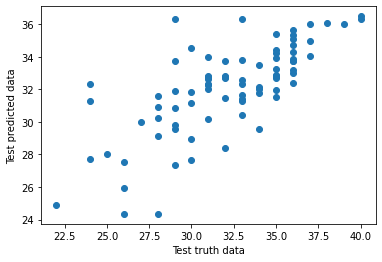

In [74]:
# truth point and predicted point

plt.scatter(y_test, regression_pred)       
plt.xlabel('Test truth data')
plt.ylabel('Test predicted data')

#### Residuals

In [75]:
residuals = y_test - regression_pred
residuals

164    2.203217
60     1.733907
61     2.834388
63     3.502832
69     2.161830
         ...   
171    0.438486
234   -7.308630
146    1.347662
210   -3.302062
105   -2.899543
Name: Temperature, Length: 81, dtype: float64

<AxesSubplot: xlabel='Temperature', ylabel='Density'>

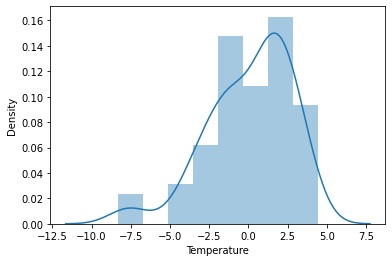

In [76]:
sns.distplot(residuals)

#### Check for Homoscedasticity

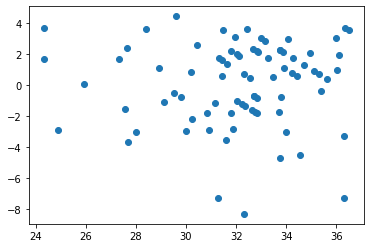

In [77]:
# scattter plot with predictions and residuals

plt.scatter(regression_pred, residuals)

#### Performance metrics

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, regression_pred))
print(mean_absolute_error(y_test,regression_pred))
print(np.sqrt(mean_squared_error(y_test, regression_pred)))

7.099059926458847
2.180854758377086
2.6644061113987196


#### R square and adjusted R square

In [79]:
from sklearn.metrics import r2_score

score = r2_score(y_test, regression_pred)
print(score)

0.5305596547249845


#### Adjusted r square

In [80]:
1 - (1-score)*(len(y_test)-1) / (len(y_test) - x_test.shape[1]-1)

0.4394742145969964

### Ridge regression

In [81]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge

Ridge()

In [82]:
ridge.fit(x_train, y_train)

Ridge()

In [83]:
#Number of features seen during fit.

print(ridge.n_features_in_)

13


In [84]:
# coefficients

print(ridge.coef_)

[-1.19105944 -0.53239882 -0.251153    0.93801826 -0.16764766  0.76200382
  0.34682216 -0.11409147 -0.20006785  0.03559311 -0.03559311 -0.13200061
  0.13200061]


In [85]:
#intecepts

print(ridge.intercept_)

32.17791411042945


In [86]:
# Comparing the scores

print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.5760064992777947
0.5307589026780655


In [87]:
# perdiction for the test data

ridge_pred = ridge.predict(x_test)
ridge_pred

array([31.79399402, 33.26846162, 33.15690722, 31.50205508, 32.83597382,
       34.72290948, 33.73402088, 34.34710989, 31.87897495, 32.82714435,
       33.74335675, 27.64625059, 35.37266991, 29.57522844, 31.94337486,
       32.12876735, 34.19949777, 28.04161265, 36.10579197, 34.31114428,
       32.6385153 , 34.50269748, 33.48946187, 32.99516368, 35.98757226,
       29.13496222, 32.36596357, 32.71258176, 27.57677069, 32.23832885,
       25.94556158, 27.35722403, 33.78499788, 32.01784542, 32.8387779 ,
       30.89445334, 28.93267922, 32.76024168, 27.71384598, 35.30004932,
       32.66183049, 34.08033003, 34.01839578, 31.57542838, 36.47512484,
       33.90125652, 24.34559258, 35.0895574 , 33.88647548, 29.54274894,
       31.14356618, 32.33722847, 35.66507232, 32.01471571, 30.24765248,
       30.18822993, 32.90005045, 36.05574344, 31.4304107 , 33.72346892,
       32.29542942, 32.7300271 , 30.85393267, 24.34909482, 31.43697482,
       36.3082553 , 29.81679712, 29.97123456, 34.97895895, 33.70

<AxesSubplot: xlabel='Temperature', ylabel='Density'>

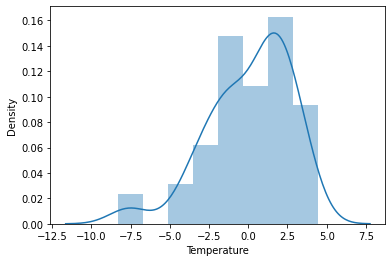

In [88]:
# residuals (errors)

residuals = y_test - ridge_pred
sns.distplot(residuals)

### Lasso Regression

In [89]:

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso

Lasso()

In [90]:
lasso.fit(x_train, y_train)

Lasso()

In [91]:
#Number of features seen during fit.

print(lasso.n_features_in_)

13


In [92]:
# Comparing the scores

print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.44230212250941503
0.39784019626969913


In [93]:
#coefficients

lasso.coef_

array([-0.71955751, -0.        , -0.        ,  0.89582004,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ])

In [94]:
#intecepts

lasso.intercept_

32.17791411042945

In [95]:
# perdiction for the test data

lasso_pred = lasso.predict(x_test)
lasso_pred

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

<AxesSubplot: xlabel='Temperature', ylabel='Density'>

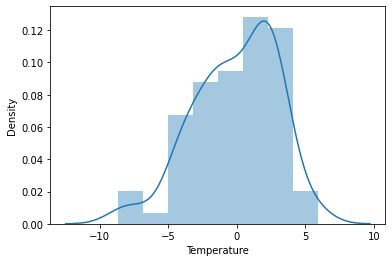

In [96]:
# residuals (errors)

sns.distplot(y_test - lasso_pred)

In [97]:
#The dual gaps at the end of the optimization for each alpha.

print(lasso.dual_gap_)

0.0026055815608287958


In [98]:
#The alphas along the path where models are computed.

print(lasso.alpha)

1.0


### ElasticNet Regression

In [99]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()
elasticnet

ElasticNet()

In [100]:
elasticnet.fit(x_train, y_train)

ElasticNet()

In [101]:
#Number of features seen during fit.

print(elasticnet.n_features_in_)

13


In [102]:
# Comparing the scores

print(elasticnet.score(x_train, y_train))
print(elasticnet.score(x_test, y_test))

0.4805737233064632
0.45172137566378634


In [103]:
#coefficients

elasticnet.coef_

array([-0.6857565 , -0.10714648, -0.01418439,  0.67454386,  0.07448445,
        0.        ,  0.22408808,  0.03964771,  0.12419025,  0.0469815 ,
       -0.04695274, -0.        ,  0.        ])

In [104]:
#intecepts

elasticnet.intercept_

32.17791411042945

In [105]:
#Sparse representation of the fitted coef_

print(elasticnet.sparse_coef_)

  (0, 0)	-0.6857565049204029
  (0, 1)	-0.107146482644999
  (0, 2)	-0.014184390307530527
  (0, 3)	0.6745438572653258
  (0, 4)	0.07448445313372896
  (0, 6)	0.22408808187450524
  (0, 7)	0.03964770546027512
  (0, 8)	0.12419024757116837
  (0, 9)	0.046981499470101565
  (0, 10)	-0.046952742649514774


In [106]:
# perdiction for the test data

els_pred = elasticnet.predict(x_test)
els_pred

array([31.87681355, 32.98570683, 32.63043016, 31.69858809, 32.96547866,
       33.98086243, 33.52628811, 32.68387469, 32.02024682, 32.72422449,
       33.40288029, 29.87056297, 34.23274101, 30.65572374, 32.74300313,
       32.28186769, 32.88004215, 29.42872512, 35.13790873, 33.93517812,
       32.43244918, 33.41241506, 33.54082997, 32.89125784, 35.15079599,
       29.96798627, 32.17105382, 32.48200938, 29.37965929, 32.07509122,
       29.16286637, 28.65778776, 33.26585195, 32.21815199, 32.69336566,
       31.2646472 , 30.00967351, 32.35844428, 29.20250248, 34.01471434,
       32.84693268, 33.57165772, 34.20571186, 31.63081303, 34.54904656,
       33.42134092, 29.34673871, 33.96821974, 33.44056879, 30.29181761,
       31.49315532, 32.36914458, 34.6659776 , 32.09111837, 31.42569908,
       30.865886  , 32.43660115, 34.8489378 , 31.55718113, 33.48521706,
       32.16063534, 32.4529475 , 31.19928002, 28.93140817, 31.81532942,
       34.87019686, 30.76343836, 30.94535245, 33.8779691 , 32.96

<AxesSubplot: xlabel='Temperature', ylabel='Density'>

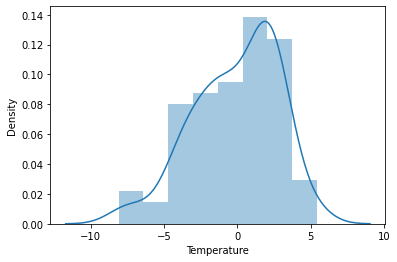

In [107]:
# residuals (errors)

sns.distplot(y_test - els_pred)

In [108]:
#The dual gaps at the end of the optimization for each alpha.

print(elasticnet.dual_gap_)

0.005329448295015027


In [109]:
#The dual gaps at the end of the optimization for each alpha.

print(elasticnet.dual_gap_)

0.005329448295015027
